### Installing python libs

In [2]:
%pip install opencv-python mediapipe matplotlib streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
## Importing libs
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np
import os

### Collecting keypoints using MP Holistic

In [4]:



mp_holistic = mp.solutions.holistic # acessing the holisitc model
mp_draw = mp.solutions.drawing_utils # visualising points and landmark in real time

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  
    results = model.process(image)                 # make landmark prediction
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


# default landmark visualisation
def draw_landmarks(image, results):
    mp_draw.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)      
    mp_draw.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)        
    mp_draw.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)     
    mp_draw.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    


# custom colored landmark
def draw_styled_landmarks(image, results):
    # draw face connections
    mp_draw.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                            mp_draw.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                            mp_draw.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                            ) 
    # draw pose connections
    mp_draw.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_draw.DrawingSpec(color=(173,216,230), thickness=2, circle_radius=4), 
                            mp_draw.DrawingSpec(color=(173,216,230), thickness=2, circle_radius=2)
                            ) 
    # draw left hand connections
    mp_draw.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                            mp_draw.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=3), 
                            mp_draw.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=2)
                            ) 
    # draw right hand connections  
    mp_draw.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                            mp_draw.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=3), 
                            mp_draw.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=2)
                            )



### video capture

In [5]:
cap = cv2.VideoCapture(0); 
# set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # reading feed from webcam
        ret, frame = cap.read()

        # holistic detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # showing landmarks in the video
        draw_styled_landmarks(image, results) ## defalut colors

        # webcam to screen
        cv2.imshow('SignSense', image)

        # closing the app
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
len(results.face_landmarks.landmark)

468

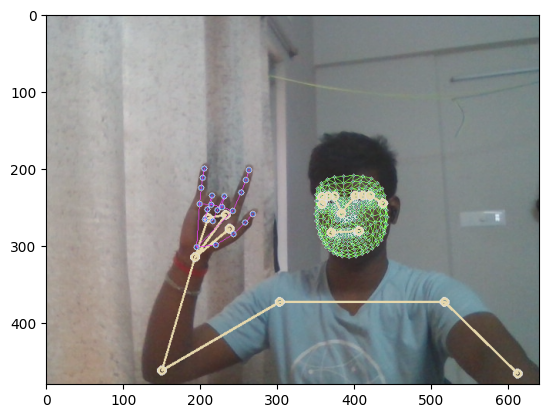

In [7]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
len(results.left_hand_landmarks.landmark)

### Storing keyframes

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

### Setting up folders for collection

In [ ]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# actions that we try to detect
actions = np.array(['hello', 'thanks' , 'ILoveYou'])

# thirty videos worth of data
no_sequences = 30

# videos are going to be 30 frames| in length
sequence_length = 30

# no. of folder
start_folder = 30

In [ ]:
import os
import numpy as np

# Loop over each action
for action in actions: 
    action_path = os.path.join(DATA_PATH, action)

    # Create the action directory if it doesn't exist
    os.makedirs(action_path, exist_ok=True)
    
    # Get all directories and check if all have 30 files
    all_dirs = [d for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))]
    
    if all(len(os.listdir(os.path.join(action_path, d))) == 30 for d in all_dirs):
        continue

    # Determine the starting directory number
    dirmax = max(map(int, all_dirs), default=0)
    
    # Create new sequence directories
    for sequence in range(no_sequences):
        sequence_path = os.path.join(action_path, str(dirmax + sequence))
        os.makedirs(sequence_path, exist_ok=True)
        print(f"Created directory: {sequence_path}")


### Collecting keyframes

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # looping through actions
    for action in actions:
        # loop through sequences the whole videos
        for sequence in range(0, no_sequences):
            # create a dir for each sequence
            output_dir = os.path.join(DATA_PATH, action, str(sequence))
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            
            # loop through video length 
            for frame_num in range(sequence_length):

                # read video feed
                ret, frame = cap.read()

                # holistic detections
                image, results = mediapipe_detection(frame, holistic)

                # draw landmarks
                draw_styled_landmarks(image, results)

                # apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # show to screen
                    cv2.imshow('SignSense', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # show to screen
                    cv2.imshow('SignSense', image)
                
                # export keypoints
                keypoints = extract_keypoints(results)
                
                # Save the keypoints starting from 0 for each sequence
                npy_path = os.path.join(output_dir, str(frame_num))
                np.save(npy_path, keypoints)

                # closing the app
                if cv2.waitKey(5) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()


In [ ]:
cap.release()
cv2.destroyAllWindows()

## Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape
np.array(labels).shape

In [ ]:
X = np.array(sequences)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
y_test.shape

## Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [ ]:
model.summary()

### Prediction

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

### Weights

In [ ]:
model.save('action.h5')
model.save('action.keras')

In [ ]:
model.load_weights('action.h5')

## Evaluation

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

## Real Time Analysis

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    if len(res) != len(actions) or len(res) != len(colors):
        raise ValueError("Length of res, actions, and colors must be the same")
    
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        prob = min(max(prob, 0), 1)  # Ensure prob is within [0, 1]
        cv2.rectangle(output_frame, (0, 60 + num * 40), 
                      (int(prob * 100), 90 + num * 40), 
                      colors[num], -1)
        cv2.putText(output_frame, actions[num], 
                    (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, 
                    (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()